In [1]:
'''
Generate sinusoidal vibration stimuli
Output via sound card a sequence of sinwaves with discrete frequency increment
Created on 2022.11.30 by Yitian Shao (yitian.shao@tu-dresden.de)
'''

# To be commented for still figure format
%matplotlib notebook
%matplotlib notebook

# Import packages
import time
from os import walk
import os.path as ospa
import numpy as np
import re
import matplotlib.pyplot as plt
import scipy.io as scio
from scipy import signal
import seaborn as sns
import IPython.display as ipd

''' Figure format'''
plt.rc('font', size=10, family='Verdana') # 'Tahoma', 'DejaVu Sans', 'Verdana'"
plt.rc('axes', edgecolor='k', linewidth=0.75, labelcolor='k')
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':True, 'top':True})
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['errorbar.capsize'] = 4

''' 
General Settings
'''
AudioFs = 44100 # (Hz) Must match the sampling frequency of the audio output

'''
General Functions
'''
def aPlot(figName='', figsize=(14, 6), is3D=False, dpi=72):
    ax = []
    
    fig1 = plt.figure(figsize=figsize, dpi=dpi)
    
    fig1.suptitle(figName, fontsize=16)
    if (is3D):
        ax = fig1.add_subplot(111, projection='3d')
    else:
        ax = fig1.add_subplot(111)
        
    return ax, fig1

def sinSignal(sinFreq=250, sinDuration=6.0, Fs=48000, isUnipolar=False, completeCycle=True): # Generate sinusoid signals with percentage range and zero start
    # Sinwave Frequency (Hz), Time duration (sec), Sampling Frequency (Hz), is Unipolar Signal or Bipolar, ensure completed cycle by adjusting time duration
    
    oneCycleDuration = 1.0/sinFreq # (secs) Time duration of one cycle
    
    adjustedDuration = np.ceil(sinDuration/oneCycleDuration)*oneCycleDuration
    
    t = np.arange(int(adjustedDuration * Fs)) / Fs
    
    if (isUnipolar):
        y = -0.5 * np.cos(2 * np.pi * sinFreq * t) + 0.5 # Unipolar: y starts from 0 and increases to 1.0 amplitude
    else:
        y = np.sin(2 * np.pi * sinFreq * t) # Bipolar: y starts from 0 and increases to +1.0, then down to -1.0 amplitude
    
    y = np.insert(y, 0, 0.0)

    return y, t

Time duration of the entire output signal = 202.2 secs


<IPython.core.display.Javascript object>


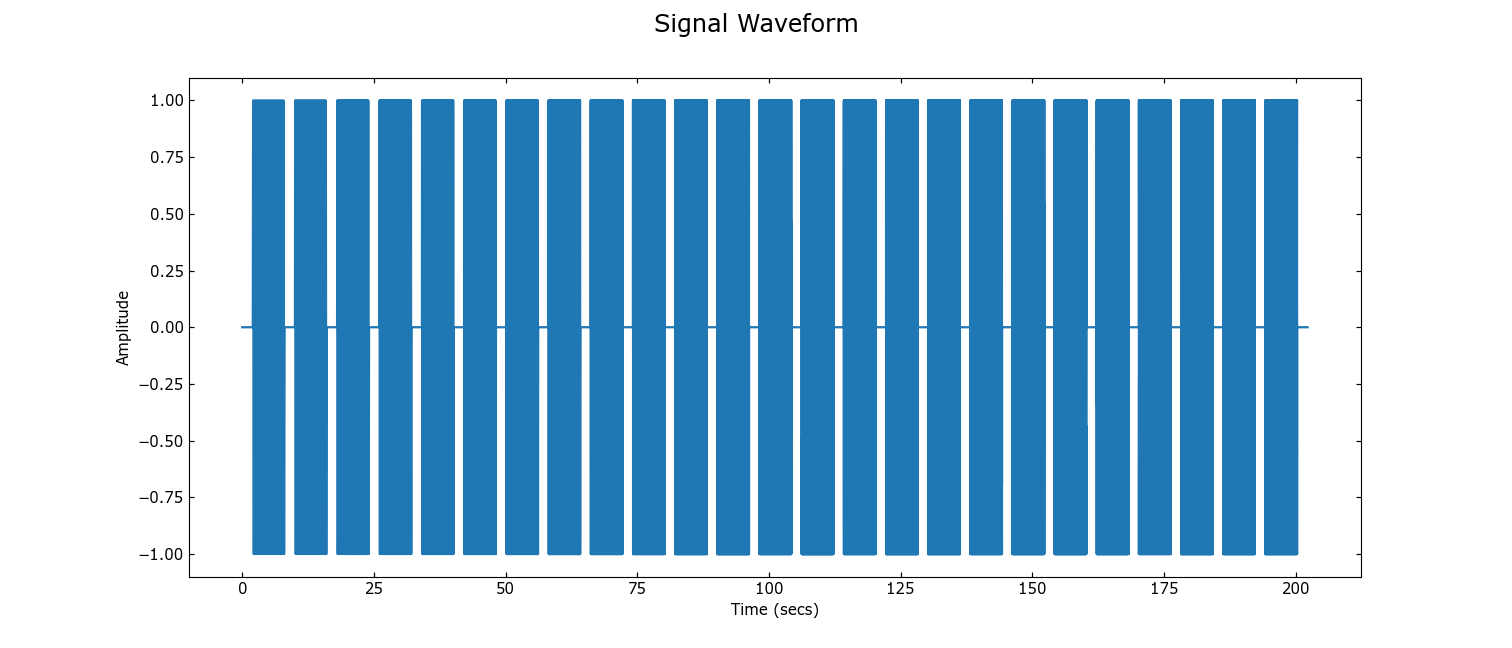

<IPython.core.display.Javascript object>


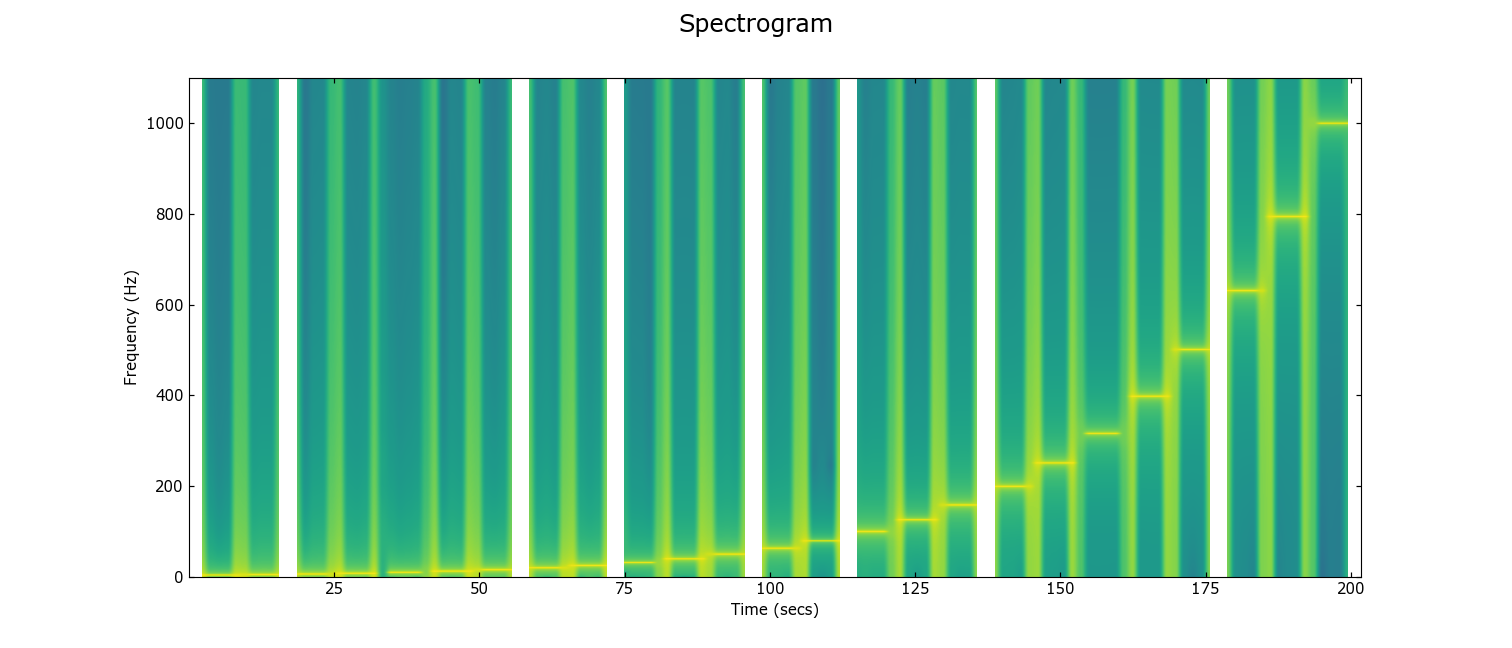

C:\Users\Shao\.conda\envs\py39\lib\site-packages\matplotlib\axes\_axes.py:7622: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


Text(0, 0.5, 'Frequency (Hz)')

In [2]:
segmentTime = 6.0 # (secs) Time duration of each sinwave segment 
segmentInterval = 2.0 # (secs) Time duration of the paused interval between every two sinwaves
# gain = 0.01 # Gain of the audio output
amplitudeCap = 1.1 # Cap of the output amplitude to prevent excessively loud sound

#[4.000e-01, 6.000e-01, 1.000e+00, 1.600e+00, 2.000e+00, 2.500e+00, 3.200e+00,
octaveFrequencies = [4.000e+00, 5.000e+00, 6.300e+00, 7.900e+00, 1.000e+01, 1.260e+01, 1.580e+01,
                     2.000e+01, 2.510e+01, 3.160e+01, 3.98e+01, 5.010e+01, 6.310e+01, 7.940e+01,
                     1.000e+02, 1.259e+02, 1.585e+02, 1.995e+02, 2.512e+02, 3.162e+02, 3.981e+02,
                     5.012e+02, 6.310e+02, 7.943e+02, 1.000e+03] # 4Hz to 1000Hz

pauseSegment = np.zeros(shape=(1,int(AudioFs*segmentInterval)))
outputSignal = pauseSegment
for f in octaveFrequencies:
    y,_ = sinSignal(sinFreq=f, sinDuration=segmentTime, Fs=AudioFs)
    outputSignal = np.append(outputSignal, y)
    outputSignal = np.append(outputSignal, pauseSegment)

# outputSignal = outputSignal * gain 
    
# Limit output votlage (sound level) for device safety
outputSignal[outputSignal > amplitudeCap] = amplitudeCap    
outputSignal[outputSignal < -amplitudeCap] = -amplitudeCap    
    
print("Time duration of the entire output signal = %.1f secs" % (outputSignal.shape[0]/AudioFs))  

t = np.arange(outputSignal.shape[0])/AudioFs
ax1,_ = aPlot(figName='Signal Waveform')
ax1.plot(t, outputSignal)
ax1.set_xlabel("Time (secs)")
ax1.set_ylabel("Amplitude")

ax2,_ = aPlot(figName='Spectrogram')
ax2.specgram(outputSignal,Fs=AudioFs, NFFT=65536)
ax2.set_ylim([0, 1100])
ax2.set_xlabel("Time (secs)")
ax2.set_ylabel("Frequency (Hz)")

In [ ]:
''' Play the output signal via sound card [Important: Check and ensure the correct amplifier settings!]'''
ipd.Audio(outputSignal,rate=AudioFs)

In [7]:
y,_ = sinSignal(sinFreq=500, sinDuration=10, Fs=AudioFs)
ipd.Audio(y,rate=AudioFs)